<a href="https://colab.research.google.com/github/sunshineluyao/AMPL/blob/main/Students/AMPL_MarketCap_TianyuWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# October 12-18 Assignment:


*   Simulate MP outcomes given the historical data of AMPL
*   Create visualization to seek for and implement the optimal trading strategy



# STEP 1: Import Data

In [ ]:
import pandas as pd
urlAMPL = 'https://raw.githubusercontent.com/williamzhao01123/crypto-lab/master/Data/Ampleforth.csv'
AMPL = pd.read_csv(urlAMPL)
AMPL

Unnamed: 0               snapped_at  ...  circulating_supply        date
0             0  2019-06-29 00:00:00 UTC  ...        4.618624e+06  2019-06-29
1             1  2019-06-30 00:00:00 UTC  ...        4.617842e+06  2019-06-30
2             2  2019-07-01 00:00:00 UTC  ...        4.770995e+06  2019-07-01
3             3  2019-07-02 00:00:00 UTC  ...        4.883634e+06  2019-07-02
4             4  2019-07-03 00:00:00 UTC  ...        4.999378e+06  2019-07-03
..          ...                      ...  ...                 ...         ...
456         456  2020-09-27 00:00:00 UTC  ...        1.534281e+08  2020-09-27
457         457  2020-09-28 00:00:00 UTC  ...        1.473012e+08  2020-09-28
458         458  2020-09-29 00:00:00 UTC  ...        1.494499e+08  2020-09-29
459         459  2020-09-30 00:00:00 UTC  ...        1.452776e+08  2020-09-30
460         460  2020-10-01 00:00:00 UTC  ...        1.381470e+08  2020-10-01

[461 rows x 7 columns]

In [ ]:
# Observe the changing trend of the price of AMPL
import plotly.express as px
def linevis(x, measure):
  fig = px.line(x, x = 'date', y = measure)
  fig.show()
linevis(AMPL, 'price')

# STEP 2: Design Simulation Function


## Simulation:

Considering the rebase given by the change of AMPL price, we will modify client's holdings (the amount of AMPL) before transaction.

In [ ]:
num = AMPL.shape[0]

In [ ]:
def simulation(mplow, mphigh):
  cash = 1000
  holding_share = 0

  for index in range(num):  
    mpmkt = AMPL['price'][index]
    mcmkt = AMPL['market_cap'][index]

    # rebase function and transaction mechanism
    if mpmkt < mplow:
      holding_share = holding_share + cash / mcmkt
      cash = 0
    if mpmkt > mphigh:
      cash = cash + holding_share * mcmkt
      holding_share = 0

  outcome = cash + holding_share * mcmkt
  return(outcome)

## Generating results with different strategies


In [ ]:
mplow = 0.01
mphigh = 0.02
low = []
high = []
outcome = []

while mphigh < 3.99:
  while mplow < mphigh:
    high.append(mphigh)
    low.append(mplow)
    outcome.append(simulation(mplow, mphigh))
    mplow = mplow + 0.01
  mphigh = mphigh + 0.01
  mplow = 0.01

data = {'mplow':low, 'mphigh':high, 'outcome': outcome}
df = pd.DataFrame(data)
print(df)

       mplow  mphigh       outcome
0       0.01    0.02   1000.000000
1       0.01    0.03   1000.000000
2       0.02    0.03   1000.000000
3       0.01    0.04   1000.000000
4       0.02    0.04   1000.000000
...      ...     ...           ...
79396   3.94    3.99  10269.593249
79397   3.95    3.99  10269.593249
79398   3.96    3.99  10269.593249
79399   3.97    3.99  10269.593249
79400   3.98    3.99  10269.593249

[79401 rows x 3 columns]


# STEP 3: Generating visualization


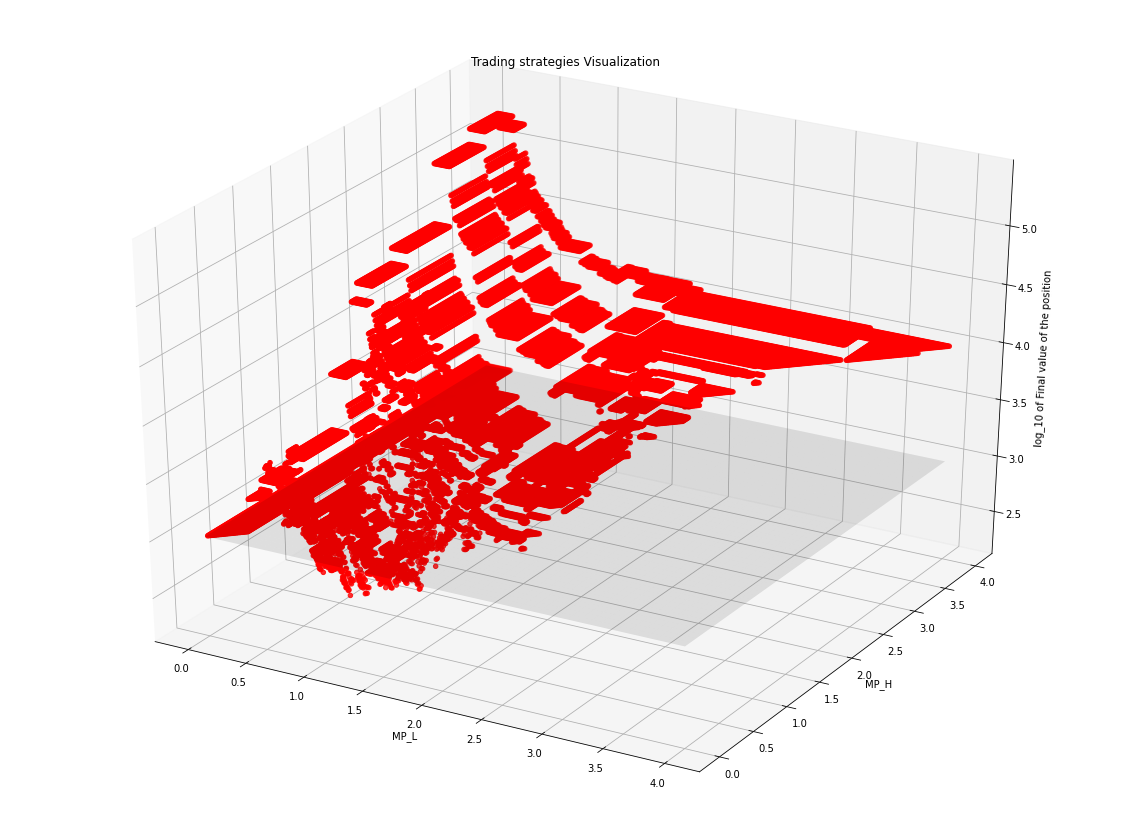

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df['sign'] = np.sign(df['outcome'])
df['log_outcome'] = np.log10(df['outcome'])

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection ="3d")

ax.set_xlabel('MP_L')
ax.set_ylabel('MP_H')
ax.set_zlabel('log_10 of Final value of the position')

# print the estimation result
ax.scatter3D(df['mplow'], df['mphigh'], df['log_outcome'], color = 'red')
plt.title("Trading strategies Visualization")

# print the baseline
X = np.arange(0, 4, 0.01)
Y = np.arange(0, 4, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X * Y * 0 + 9) # 9 refers to the square of log_10_10^3

ax.plot_surface(X, Y, Z, alpha = 0.1, color = 'black')

# show plot
plt.show()


In [ ]:
df.idxmax()
df.iloc[57652]

mplow           0.230000
mphigh          3.410000
outcome    215097.695433
sign            1.000000
Name: 57652, dtype: float64

In [ ]:
df.idxmin()
df.iloc[6327]

mplow        1.120000
mphigh       1.130000
outcome    216.135028
sign         1.000000
Name: 6327, dtype: float64

In [ ]:
import plotly.express as px
import numpy as np

fig = px.colors.diverging.swatches().update_layout(margin_b=10)
fig.show()

df['sign'] = np.sign(df['outcome']-1000)
df['log_outcome'] = np.log10(df['outcome'])

# Creating plot
fig = px.scatter(df, x="mplow", y="mphigh", size="log_outcome", color="log_outcome", hover_name="log_outcome",log_x=True, log_y=True, color_continuous_scale=px.colors.diverging.Portland)

# Setting Labels
fig.update_layout(title='log_10 of trading outcome', xaxis=dict(title='MP_L', gridcolor='white', gridwidth=2),
    yaxis=dict(title='MP_H', gridcolor='white', gridwidth=2))

# show plot
fig.show()